In [25]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [26]:
#Case 9A: k = 1e-15 || CO2 injection at 380°C (&42MPa) + H2O in the reservoir || 400m Well Spacing || m_flux_CO2 = 6

In [27]:
k_CO2_1em15 = pd.read_csv('CO2_9A_csv.csv')
# Energy production of water AND CO2 ???
#Energy production in Joules (bc. h_w or h_g is in kJ/kg)
k_CO2_1em15["Energy Production at this timestep"] = (k_CO2_1em15.mass_kg_h2o_extracted_this_timestep * k_CO2_1em15.h_w)*1000
k_CO2_1em15["Cumulative Energy Produced"] = k_CO2_1em15["Energy Production at this timestep"].cumsum()
k_CO2_1em15["Cumulative Produced CO2"] = k_CO2_1em15["mass_kg_co2_extracted_this_timestep"].cumsum()
# Injected CO2: time * mass flow CO2
k_CO2_1em15["Injected CO2 [kg]"] = k_CO2_1em15["time"]*6
#Conversion to kilotons
k_CO2_1em15["Injected CO2 [kt]"] = k_CO2_1em15["Injected CO2 [kg]"]*1e-6
#
#MW produced:

k_CO2_1em15["MW"] = (k_CO2_1em15["Cumulative Energy Produced"]/1e6)/k_CO2_1em15["time"]

#Stored CO2:
# = Injected CO2 - produced CO2 [kg]
k_CO2_1em15["Stored CO2 [kt]"] = (k_CO2_1em15["Injected CO2 [kg]"] - k_CO2_1em15["mass_kg_co2_extracted_this_timestep"])*1e-6

k_CO2_1em15["Time [y]"] = k_CO2_1em15["time"]/3.154E7
k_CO2_1em15.rename(columns={"time": "Time [s]","heat_joules_extracted_this_timestep_co2": "Heat Extracted CO2 [Joules]","heat_joules_extracted_this_timestep_h2o": "Heat Extracted H2O [Joules]","mass_kg_co2_extracted_this_timestep":"Mass CO2 Extracted [kg]","mass_kg_h2o_extracted_this_timestep":"Mass H2O Extracted [kg]","temperature":"Temperature [°C]","mu_g":"$\u03BC_g$","mu_w":"$\u03BC_w$","rhog":"$\u03C1_g$","rhow":"$\u03C1_w$","h_g":"$h_g$","h_w":"$h_w$","Sg":"$S_g$","Sw":"$S_w$"}, inplace=True)
k_CO2_1em15

,Time [s],$S_g$,$S_w$,$h_g$,$h_w$,Heat Extracted CO2 [Joules],Heat Extracted H2O [Joules],Mass CO2 Extracted [kg],Mass H2O Extracted [kg],$μ_g$,...,$ρ_w$,Temperature [°C],Energy Production at this timestep,Cumulative Energy Produced,Cumulative Produced CO2,Injected CO2 [kg],Injected CO2 [kt],MW,Stored CO2 [kt],Time [y]
0,0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0,0.0000,NaN,0.000000,0.000000
1,86400,0.000000e+00,1.000000,457061.348480,3.046229e+06,0.000000e+00,3.074222e+09,0.000000e+00,1004.066195,0.000038,...,127.487236,772.648135,3.058615e+12,3.058615e+12,0.000000e+00,518400,0.5184,35.400641,0.518400,0.002739
2,259200,0.000000e+00,1.000000,457110.968805,3.051077e+06,0.000000e+00,4.923175e+09,0.000000e+00,1606.321094,0.000038,...,125.749741,772.435530,4.901009e+12,7.959624e+12,0.000000e+00,1555200,1.5552,30.708427,1.555200,0.008218
3,604800,0.000000e+00,1.000000,457061.563245,3.053524e+06,0.000000e+00,8.860850e+09,0.000000e+00,2890.713269,0.000038,...,124.805868,772.157416,8.826863e+12,1.678649e+13,0.000000e+00,3628800,3.6288,27.755436,3.628800,0.019176
4,1296000,0.000000e+00,1.000000,456932.005722,3.055047e+06,0.000000e+00,1.628576e+10,0.000000e+00,5313.967992,0.000038,...,124.128256,771.758281,1.623442e+13,3.302091e+13,0.000000e+00,7776000,7.7760,25.479097,7.776000,0.041091
5,2678400,0.000000e+00,1.000000,456721.290260,3.056016e+06,0.000000e+00,3.012004e+10,0.000000e+00,9832.321313,0.000038,...,123.579377,771.227066,3.004773e+13,6.306864e+13,0.000000e+00,16070400,16.0704,23.547132,16.070400,0.084921
6,5443200,0.000000e+00,1.000000,456447.112033,3.056624e+06,0.000000e+00,5.577660e+10,0.000000e+00,18217.967125,0.000038,...,123.104421,770.625459,5.568547e+13,1.187541e+14,0.000000e+00,32659200,32.6592,21.816965,32.659200,0.172581
7,10972800,0.000000e+00,1.000000,456158.117417,3.057136e+06,0.000000e+00,1.029277e+11,0.000000e+00,33634.616089,0.000038,...,122.651364,770.095902,1.028256e+14,2.215797e+14,0.000000e+00,65836800,65.8368,20.193543,65.836800,0.347901
8,22032000,0.000000e+00,1.000000,455910.956690,3.057900e+06,0.000000e+00,1.873847e+11,0.000000e+00,61242.690508,0.000038,...,122.146129,769.772139,1.872740e+14,4.088537e+14,0.000000e+00,132192000,132.1920,18.557268,132.192000,0.698542
9,44150400,0.000000e+00,1.000000,455737.845810,3.059126e+06,0.000000e+00,3.329707e+11,0.000000e+00,108800.121894,0.000038,...,121.541995,769.673810,3.328333e+14,7.416870e+14,0.000000e+00,264902400,264.9024,16.799101,264.902400,1.399822


In [28]:
#Case 9B: k = 1e-15 || H2O only - injection Temp 380°C (&42MPa) || 400m Well Spacing || m_flux_H2O = 11 kg/s 

In [29]:
k_H2O_1em15 = pd.read_csv("H2O_9B_csv.csv")
#Energy production in Joules (bc. h_w or h_g is in kJ/kg)
k_H2O_1em15["Energy Production at this timestep"] = (k_H2O_1em15.mass_kg_h2o_extracted_this_timestep * k_H2O_1em15.h_w)*1000
k_H2O_1em15["Cumulative Energy Produced"] = k_H2O_1em15["Energy Production at this timestep"].cumsum()
#MW produced:

k_H2O_1em15["MW"] = (k_H2O_1em15["Cumulative Energy Produced"]/1e6)/k_H2O_1em15["time"]

k_H2O_1em15["Time [y]"] = k_H2O_1em15["time"]/3.154E7
k_H2O_1em15.rename(columns={"time": "Time [s]","heat_joules_extracted_this_timestep_co2": "Heat Extracted CO2 [Joules]","heat_joules_extracted_this_timestep_h2o": "Heat Extracted H2O [Joules]","mass_kg_co2_extracted_this_timestep":"Mass CO2 Extracted [kg]","mass_kg_h2o_extracted_this_timestep":"Mass H2O Extracted [kg]","temperature":"Temperature [°C]","mu_g":"$\u03BC_g$","mu_w":"$\u03BC_w$","rhog":"$\u03C1_g$","rhow":"$\u03C1_w$","h_g":"$h_g$","h_w":"$h_w$","Sg":"$S_g$","Sw":"$S_w$"}, inplace=True)
k_H2O_1em15

,Time [s],$S_g$,$S_w$,$h_g$,$h_w$,Heat Extracted CO2 [Joules],Heat Extracted H2O [Joules],Mass CO2 Extracted [kg],Mass H2O Extracted [kg],$μ_g$,$μ_w$,$ρ_g$,$ρ_w$,Temperature [°C],Energy Production at this timestep,Cumulative Energy Produced,MW,Time [y]
0,0,0,0,0.000000,0.000000e+00,0,0.000000e+00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000
1,86400,0,1,457061.348480,3.046229e+06,0,3.074222e+09,0,1004.066195,0.000038,0.000033,208.563627,127.487236,772.648135,3.058615e+12,3.058615e+12,35.400641,0.002739
2,259200,0,1,457110.968819,3.051077e+06,0,4.923175e+09,0,1606.321069,0.000038,0.000032,206.750828,125.749741,772.435530,4.901009e+12,7.959624e+12,30.708427,0.008218
3,604800,0,1,457061.558556,3.053524e+06,0,8.860894e+09,0,2890.727794,0.000038,0.000032,205.744846,124.805914,772.157414,8.826907e+12,1.678653e+13,27.755508,0.019176
4,1296000,0,1,456931.750997,3.055041e+06,0,1.628979e+10,0,5315.289227,0.000038,0.000032,205.004223,124.130396,771.758116,1.623842e+13,3.302496e+13,25.482219,0.041091
5,2678400,0,1,456717.608370,3.055937e+06,0,3.021334e+10,0,9862.952414,0.000038,0.000032,204.405191,123.604540,771.223768,3.014057e+13,6.316552e+13,23.583304,0.084921
6,5443200,0,1,456423.270558,3.056209e+06,0,5.671667e+10,0,18526.935172,0.000038,0.000032,203.955578,123.233653,770.599302,5.662218e+13,1.197877e+14,22.006854,0.172581
7,10972800,0,1,456069.094117,3.055868e+06,0,1.083271e+11,0,35411.352273,0.000038,0.000032,203.674208,123.031085,769.987331,1.082124e+14,2.280001e+14,20.778665,0.347901
8,22032000,0,1,455678.271877,3.055142e+06,0,2.092616e+11,0,68448.552581,0.000038,0.000032,203.499723,122.935155,769.478326,2.091201e+14,4.371202e+14,19.840242,0.698542
9,44150400,0,1,455246.352705,3.054145e+06,0,4.062528e+11,0,132951.655244,0.000038,0.000032,203.382198,122.899891,769.057947,4.060537e+14,8.431739e+14,19.097764,1.399822


In [30]:
# Cumulative Energy Production over 20 Years: H2O only vs. CO2 injection

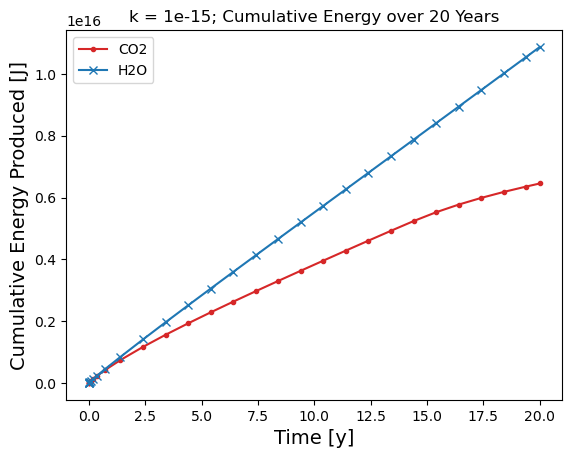

In [31]:
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Cumulative Energy Produced"],'C3', marker=".", linestyle ='-', label='CO2')
plt.plot(k_H2O_1em15["Time [y]"], k_H2O_1em15["Cumulative Energy Produced"],'C0', marker="x", linestyle ='-', label='H2O')
plt.title("k = 1e-15; Cumulative Energy over 20 Years")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Cumulative Energy Produced [J]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case9/Case9_cum_energy_k_1em15.png')

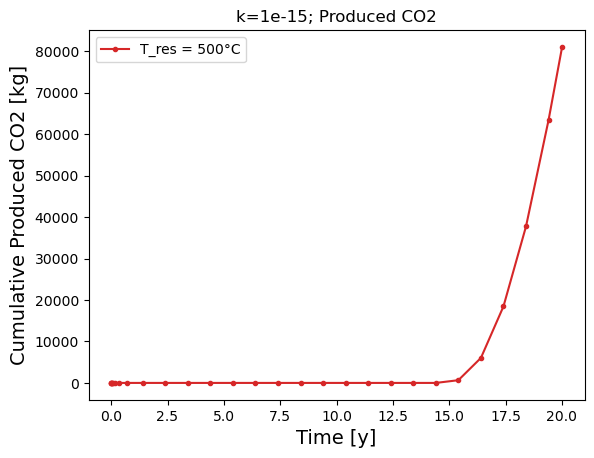

In [32]:
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Cumulative Produced CO2"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-15; Produced CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Cumulative Produced CO2 [kg]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case9/Case9_co2_production_k_1em15.png')

In [33]:
# Mass of injected CO2 at 6kg/s CO2 mass flux

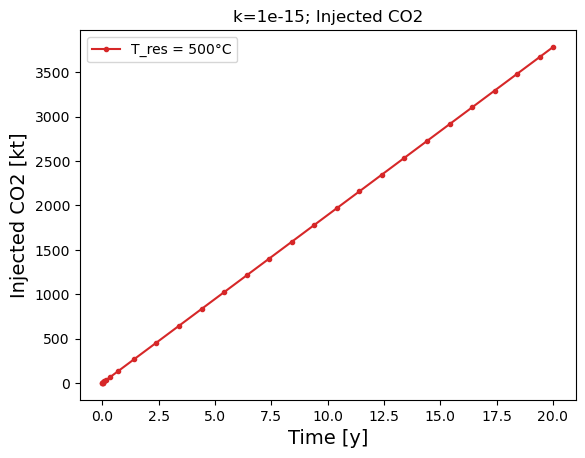

In [34]:
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Injected CO2 [kt]"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-15; Injected CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Injected CO2 [kt]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case9/Case9_co2_injection_k_1em15.png')

In [35]:
#Stored CO2 in kt at mass flux CO2 6kg/s 

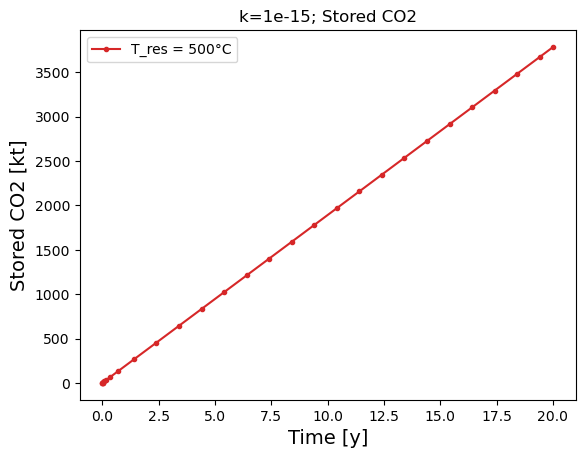

In [36]:
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Stored CO2 [kt]"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-15; Stored CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Stored CO2 [kt]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case9/Case9_co2_stored_k_1em15.png')